In [1]:
#import modules
import pandas as pd
import scipy.stats as st
import csv
import numpy as np
import matplotlib.pyplot as plt

#read csv into DataFrame
df = pd.read_csv('../clean_data.csv')
df.head()

,Age,Gender,Occupation,Use Social Media (Y/N),Soical Media Platforms Used,Average time on social media (per Day),How often do you find yourself using Social media without a specific purpose?,How often do you get distracted by Social media when you are busy doing something?,Do you feel restless if you haven't used Social media in a while?,"On a scale of 1 to 5, how easily distracted are you?","On a scale of 1 to 5, how much are you bothered by worries?",Do you find it difficult to concentrate on things?,"On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","Following the previous question, how do you feel about these comparisons, generally speaking?",How often do you look to seek validation from features of social media?,How often do you feel depressed or down?,"On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [2]:
#get list of column names
for col in df.columns:
    print(col)


Age
Gender
Occupation
Use Social Media (Y/N)
Soical Media Platforms Used
Average time on social media (per Day)
How often do you find yourself using Social media without a specific purpose?
How often do you get distracted by Social media when you are busy doing something?
Do you feel restless if you haven't used Social media in a while?
On a scale of 1 to 5, how easily distracted are you?
On a scale of 1 to 5, how much are you bothered by worries?
Do you find it difficult to concentrate on things?
On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
Following the previous question, how do you feel about these comparisons, generally speaking?
How often do you look to seek validation from features of social media?
How often do you feel depressed or down?
On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?
On a scale of 1 to 5, how often do you face issues regarding sleep?


In [3]:
#drop unnecessary columns and check df length
sm_df = df.drop(columns=['Age','Gender','Occupation', 'Soical Media Platforms Used'\
                            ,'How often do you find yourself using Social media without a specific purpose?', \
                            'How often do you get distracted by Social media when you are busy doing something?', \
                            "Do you feel restless if you haven't used Social media in a while?",\
                            "On a scale of 1 to 5, how easily distracted are you?", \
                            "On a scale of 1 to 5, how much are you bothered by worries?",\
                            "Do you find it difficult to concentrate on things?",\
                            "On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",\
                            "Following the previous question, how do you feel about these comparisons, generally speaking?",\
                            "How often do you look to seek validation from features of social media?",\
                            "How often do you feel depressed or down?",\
                            "On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?"])
print(sm_df.shape)

(451, 3)


In [4]:
#remove results of those not using social media and check df length
sleep_df = sm_df[sm_df['Use Social Media (Y/N)'] == 'Yes']
print(sleep_df.shape)
#simplify column names
sleep_df = sleep_df.drop(columns=['Use Social Media (Y/N)'])
sleep_df = sleep_df.rename(columns={"Average time on social media (per Day)":"sm_time", \
                                    "On a scale of 1 to 5, how often do you face issues regarding sleep?":"sleep_issues"})
#drop nan and display df 
sleep_df.dropna()
sleep_df.head()

(448, 3)


,sm_time,sleep_issues
0,Between 2 and 3 hours,5
1,More than 5 hours,5
2,Between 3 and 4 hours,5
3,More than 5 hours,2
4,Between 2 and 3 hours,1


In [5]:
#read second csv into df
df_2 = pd.read_csv('../Media Consumption and Wellness.csv')
df_2.head()

,Timestamp,Username,Name,UID,Phone Number,Do you consume any kind of media,Type of media that you consume the most-,Second preferred choice-,Most preferred Social media platform-,Preferred Cable Network-,...,Total media consumption (in hours)-,Social media consumption (in hours)-,Cable network consumption (in hours)-,Print media consumption (in hours)-,Do you use OTT platform-,Most preferred OTT platform-,Duration of OTT consumption (in hours)-,Does media consumption affect your sleep cycle-,How many hours do you sleep?,Do you think social media avoidance will lead to quality sleep?
0,2023/05/08 11:28:53 AM GMT+5:30,janveesingh20@gmail.com,Janvee Singh,21bcs10939,8668249913,Yes,Social Media,Print Media,Youtube,Infotainment (eg. Discovery Channel),...,2 to 3,1 to 2,Never,1 to 2,No,NaN,NaN,Yes,6 to 8,Yes
1,2023/05/08 11:30:17 AM GMT+5:30,jatinpanghal007@gmail.com,Jatin Panghal,21BCS10965,8398894114,Yes,Social Media,Print Media,Twitter,Infotainment (eg. Discovery Channel),...,more than 4,3 to 4,Never,1 to 2,Yes,Amazon Prime,1 to 2,Yes,6 to 8,Yes
2,2023/05/08 11:31:22 AM GMT+5:30,sashu3775@gmail.com,Ashu Kumar Singh,21BCS9629,9128666813,Yes,Social Media,Print Media,Whatsapp,NaN,...,3 to 4,2 to 3,1 to 2,NaN,Yes,Hotstar,2 to 3,Yes,4 to 6,Yes
3,2023/05/08 11:32:16 AM GMT+5:30,rohansamant82@gmail.com,Rohan Singh Samant,21BCS9687,8176998974,Yes,Social Media,Print Media,Instagram,Infotainment (eg. Discovery Channel),...,2 to 3,1 to 2,Never,1 to 2,Yes,Amazon Prime,1 to 2,No,6 to 8,Yes
4,2023/05/08 11:32:27 AM GMT+5:30,abhishekkumarsingh17966@gmail.com,Abhishek kumar singh,21BCS9612,8709252439,Yes,Social Media,Cable Network,Instagram,Movies,...,2 to 3,1 to 2,1 to 2,Never,Yes,Jio Cinema,1 to 2,Yes,6 to 8,Yes


In [6]:
#print column names
for col in df_2.columns:
    print(col)

Timestamp
Username
Name
UID
Phone Number
Do you consume any kind of media
Type of media that you consume the most-
Second preferred choice-
Most preferred Social media platform-
Preferred Cable Network-
Preferred print media- 
Total media consumption (in hours)-
Social media consumption (in hours)-
Cable network consumption (in hours)-
Print media consumption (in hours)-
Do you use OTT platform-
Most preferred OTT platform-
Duration of OTT consumption (in hours)-
Does media consumption affect your sleep cycle-
How many hours do you sleep?
Do you think social media avoidance will lead to quality sleep?


In [7]:
#drop unnecessary columns and check df length
sm2_df = df_2.drop(columns=['Timestamp', 'Username', 'Name', 'UID', 'Phone Number', 'Do you consume any kind of media', \
                            'Second preferred choice-', 'Preferred Cable Network-', \
                            'Total media consumption (in hours)-', 'Cable network consumption (in hours)-', \
                            'Print media consumption (in hours)-','Do you use OTT platform-','Most preferred OTT platform-',\
                            'Duration of OTT consumption (in hours)-', 'Preferred print media- ', 'Do you think social media avoidance will lead to quality sleep?'])
#check length
print(sm2_df.shape)

(155, 5)


In [8]:
#remove results of those not preferring social media and check df length
sleep_df2 = sm2_df[sm2_df['Type of media that you consume the most-'] == 'Social Media']
print(sleep_df2.shape)

#drop unnecessary columns and simplify column names
sleep_df2 = sleep_df2.drop(columns={'Type of media that you consume the most-', 'Most preferred Social media platform-'})
sleep_df2 = sleep_df2.rename(columns={"Social media consumption (in hours)-":"sm_hours","Does media consumption affect your sleep cycle-"\
                                     :"y_n", "How many hours do you sleep?":"sleep_hours"})
#drop nan 
sleep_df2.dropna()
sleep_df2.head()

(145, 5)


,sm_hours,y_n,sleep_hours
0,1 to 2,Yes,6 to 8
1,3 to 4,Yes,6 to 8
2,2 to 3,Yes,4 to 6
3,1 to 2,No,6 to 8
4,1 to 2,Yes,6 to 8


In [9]:
#group the first df by hours of consumption and calculate mean response to sleep question
usage = sleep_df.groupby('sm_time')['sleep_issues'].mean()
usage_df = pd.DataFrame(data=usage)
#rename index for graph
usage_df = usage_df.rename(index={"Between 1 and 2 hours":"1-2", "Between 2 and 3 hours":"2-3", "Between 3 and 4 hours" \
                                 :"3-4", "Between 4 and 5 hours":"4-5", "Less than an Hour":"<1", "More than 5 hours":">5"})
#reorder index for graph
usage_df = usage_df.reindex(["<1", "1-2", "2-3", "3-4", "4-5", ">5"])

#display data
display(usage_df)

,sleep_issues
sm_time,
<1,2.562500
1-2,2.936508
2-3,3.150538
3-4,3.244186
4-5,3.444444
>5,3.450450


Axes(0.125,0.11;0.775x0.77)


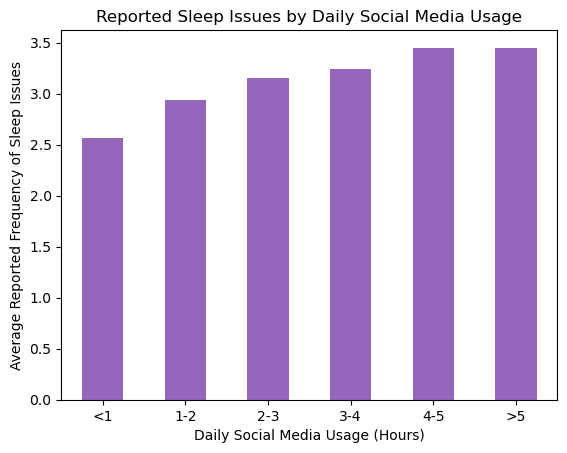

In [10]:
#create bar graph to represent above df
plot_2 = usage_df.plot.bar(yticks=np.arange(0,4,0.5), color="tab:purple", \
                          title="Reported Sleep Issues by Daily Social Media Usage", rot=360, legend=False)
plot_2.set_ylabel('Average Reported Frequency of Sleep Issues')
plot_2.set_xlabel("Daily Social Media Usage (Hours)")
print(plot_2)

#save figure
fig_2 = plot_2.get_figure()
fig_2.savefig("fig_2.png")

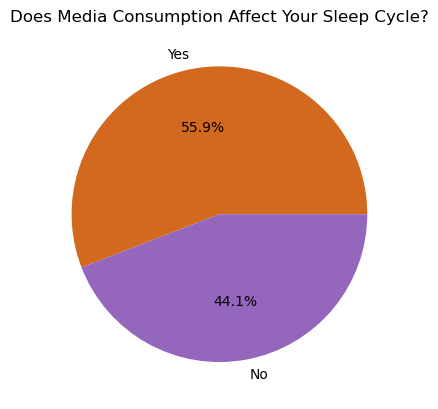

In [11]:
#create a pie chart to represent respondents who feel media consumption effects their sleep
cycle = sleep_df2['y_n'].value_counts()
plt.pie(cycle, autopct="%1.1f%%", labels=["Yes", "No"], colors=['chocolate', 'tab:purple'])
plt.title('Does Media Consumption Affect Your Sleep Cycle?')

#save figure 
plt.savefig("fig_1.png")

In [12]:
#create a groupby to calculate mean sleep responses and total number of responses
sleep_use = sleep_df2.groupby('sm_hours')['sleep_hours'].value_counts()
sleep_use_df = pd.DataFrame(sleep_use)
total = sleep_use_df.groupby('sm_hours')['count'].sum()

#calculate percentage of respondents in each usage group
per = round((sleep_use/total) *100, 1)
percent_df = pd.DataFrame(data=per)

#rename the index for graph
percent_df = percent_df.rename(index={'1 to 2':"1-2", "2 to 3":'2-3', "3 to 4":"3-4", "More than 4":">4"})

#ungroup the data for the graph 
percent_df = percent_df.unstack()

#display the data
display(percent_df)

count                 
sleep_hours 4 to 6 6 to 8 8 or more
sm_hours                           
1-2           22.2   69.8       7.9
2-3           17.1   80.0       2.9
3-4           27.8   66.7       5.6
>4            36.0   44.0      20.0

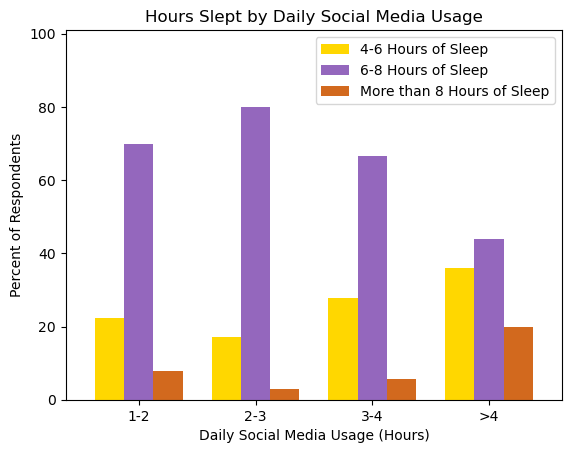

In [13]:
#create grouped bar using the above dataframe
plot_3 = percent_df.plot.bar(color={"tab:purple", "gold", "chocolate"}, \
                          title="Hours Slept by Daily Social Media Usage", rot=360, ylim=(0,101), width = 0.75)
plot_3.set_ylabel("Percent of Respondents")
plot_3.set_xlabel("Daily Social Media Usage (Hours)")
plot_3.legend(["4-6 Hours of Sleep", "6-8 Hours of Sleep", "More than 8 Hours of Sleep"])

#save figure
fig_3 = plot_3.get_figure()
fig_3.savefig("fig_3.png")